In [7]:
import pandas as pd

In [61]:
df=pd.read_csv('train.csv')

In [9]:
df.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.322604              78.86                   7   
3               0.337029              81.79                   3   
4               0.541140              77.16                   3   

   Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  
0   31335.476824           3                0.424352         7570  
1   26024.711057           2                0.352350        12128  
2   39269.053927           3                0.003364         2181  
3   42771.499200           1                0.211728         5946  
4   35509.228515           2                0.176883         9054

In [10]:
df.Severity.value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [62]:
dict_sev={
'Minor_Damage_And_Injuries':0,
'Highly_Fatal_And_Damaging':1,
'Significant_Damage_And_Serious_Injuries':2,
'Significant_Damage_And_Fatalities':3
}

In [63]:
df['sev']=df['Severity'].map(dict_sev)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
sev                        10000 non-null int64
dtypes: float64(6), int64(6), object(1)
memory usage: 1015.8+ KB


In [14]:
df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
sev                        0
dtype: int64

In [15]:
#df.drop('Severity',axis=1,inplace=True)

In [16]:
df.head(2)

Severity  Safety_Score  Days_Since_Inspection  \
0  Minor_Damage_And_Injuries     49.223744                     14   
1  Minor_Damage_And_Injuries     62.465753                     10   

   Total_Safety_Complaints  Control_Metric  Turbulence_In_gforces  \
0                       22       71.285324               0.272118   
1                       27       72.288058               0.423939   

   Cabin_Temperature  Accident_Type_Code  Max_Elevation  Violations  \
0              78.04                   2   31335.476824           3   
1              84.54                   2   26024.711057           2   

   Adverse_Weather_Metric  Accident_ID  sev  
0                0.424352         7570    0  
1                0.352350        12128    0

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X=df.drop(['sev','Severity'],axis=1)
y=df['sev']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
from sklearn.tree import DecisionTreeClassifier
dfc=DecisionTreeClassifier()
dfc.fit(X_train, y_train) 
dfc_pred = dfc.predict(X_test) 
print(classification_report(dfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       847
           1       0.90      0.91      0.90       995
           2       0.90      0.91      0.90       930
           3       0.87      0.89      0.88       528

    accuracy                           0.90      3300
   macro avg       0.90      0.90      0.90      3300
weighted avg       0.90      0.90      0.90      3300



In [22]:
dfc_pred

array([2, 3, 3, ..., 2, 2, 1], dtype=int64)

In [69]:
import pickle
filename='dfc_model'
pickle.dump(dfc,open(filename,'wb'))

In [70]:
testdata=pd.read_csv('test.csv')

In [25]:
testdata.isnull().sum()

Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [26]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
Safety_Score               2500 non-null float64
Days_Since_Inspection      2500 non-null int64
Total_Safety_Complaints    2500 non-null int64
Control_Metric             2500 non-null float64
Turbulence_In_gforces      2500 non-null float64
Cabin_Temperature          2500 non-null float64
Accident_Type_Code         2500 non-null int64
Max_Elevation              2500 non-null float64
Violations                 2500 non-null int64
Adverse_Weather_Metric     2500 non-null float64
Accident_ID                2500 non-null int64
dtypes: float64(6), int64(5)
memory usage: 215.0 KB


In [27]:
testdata.describe()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
count   2500.000000            2500.000000              2500.000000   
mean      41.825224              12.946400                 6.574800   
std       16.280187               3.523364                 7.179542   
min        0.000000               1.000000                 0.000000   
25%       30.593607              11.000000                 1.000000   
50%       41.461187              13.000000                 4.000000   
75%       52.751142              15.000000                 9.000000   
max      100.000000              23.000000                54.000000   

       Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
count     2500.000000            2500.000000        2500.000000   
mean        65.368058               0.376197          79.993068   
std         11.442005               0.116960           2.713833   
min         20.966272               0.143376          74.740000   
25%         57.702826               0.292583          77.930000   
50%         66.066545               0.357404          79.600000   
75%         73.119872               0.441699          81.530000   
max         97.994531               0.881926          94.200000   

       Accident_Type_Code  Max_Elevation   Violations  Adverse_Weather_Metric  \
count         2500.000000    2500.000000  2500.000000             2500.000000   
mean             3.853600   32383.134179     1.990800                0.250886   
std              1.877652    9485.096436     1.018592                0.387663   
min              1.000000     831.695553     0.000000                0.000368   
25%              2.000000   26008.851717     1.000000                0.013136   
50%              4.000000   32472.865497     2.000000                0.072466   
75%              5.000000   38759.519071     3.000000                0.315407   
max              7.000000   62315.408444     5.000000                2.365378   

        Accident_ID  
count   2500.000000  
mean    6186.283200  
std     3602.235035  
min        1.000000  
25%     3071.750000  
50%     6159.500000  
75%     9309.250000  
max    12493.000000

In [28]:
df.describe()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
count  10000.000000           10000.000000             10000.000000   
mean      41.876406              12.931100                 6.564300   
std       16.138072               3.539803                 6.971982   
min        0.000000               1.000000                 0.000000   
25%       30.593607              11.000000                 2.000000   
50%       41.278539              13.000000                 4.000000   
75%       52.511416              15.000000                 9.000000   
max      100.000000              23.000000                54.000000   

       Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
count    10000.000000           10000.000000       10000.000000   
mean        65.145324               0.381495          79.969331   
std         11.882934               0.121301           2.759739   
min          0.000000               0.134000          74.740000   
25%         56.927985               0.293665          77.960000   
50%         65.587967               0.365879          79.540000   
75%         73.336372               0.451346          81.560000   
max        100.000000               0.882648          97.510000   

       Accident_Type_Code  Max_Elevation   Violations  Adverse_Weather_Metric  \
count        10000.000000   10000.000000  10000.00000            10000.000000   
mean             3.814900   32001.803282      2.01220                0.255635   
std              1.902577    9431.995196      1.03998                0.381128   
min              1.000000     831.695553      0.00000                0.000316   
25%              2.000000   25757.636908      1.00000                0.012063   
50%              4.000000   32060.336419      2.00000                0.074467   
75%              5.000000   38380.641513      3.00000                0.354059   
max              7.000000   64297.651218      5.00000                2.365378   

        Accident_ID           sev  
count  10000.000000  10000.000000  
mean    6266.554200      1.359200  
std     3610.170288      1.036669  
min        2.000000      0.000000  
25%     3139.750000      0.000000  
50%     6280.500000      1.000000  
75%     9391.500000      2.000000  
max    12500.000000      3.000000

In [29]:
testdata.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [71]:
ans=dfc.predict(testdata)

In [72]:
rev_dict_sev={
0:'Minor_Damage_And_Injuries',
1:'Highly_Fatal_And_Damaging',
2:'Significant_Damage_And_Serious_Injuries',
3:'Significant_Damage_And_Fatalities'
}

In [74]:
testdata.Accident_ID.head()

0     1
1    10
2    14
3    17
4    21
Name: Accident_ID, dtype: int64

In [75]:
sub=testdata.Accident_ID

In [78]:
ans=pd.DataFrame(ans,columns=['Severity'])
final_sub=pd.concat([sub,ans],axis=1)

In [79]:
final_sub.head()

Accident_ID  Severity
0            1         1
1           10         3
2           14         2
3           17         1
4           21         3

In [80]:
final_sub['Severity']=final_sub['Severity'].map(rev_dict_sev)

In [82]:
print(final_sub.shape)
final_sub.head()

(2500, 2)


Accident_ID                                 Severity
0            1                Highly_Fatal_And_Damaging
1           10        Significant_Damage_And_Fatalities
2           14  Significant_Damage_And_Serious_Injuries
3           17                Highly_Fatal_And_Damaging
4           21        Significant_Damage_And_Fatalities

In [84]:
final_sub.to_csv('predictions.csv',index=False)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

In [195]:
from sklearn.ensemble import RandomForestClassifier
# got hyperparameter tuning from AutoMl TPOT
rfc=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None,
                                        max_features=0.9000000000000001,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=3, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=0.9000000000000001, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [196]:
rfc_pred=rfc.predict(X_test)
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [197]:
ans=rfc.predict(testdata)
sub=testdata.Accident_ID
ans=pd.DataFrame(ans,columns=['Severity'])
final_sub=pd.concat([sub,ans],axis=1)
final_sub['Severity']=final_sub['Severity'].map(rev_dict_sev)
final_sub.to_csv('rfc_predictions.csv',index=False)

# 83.57709

# 84.44775 when training part was enlarged in train_test_split

# 84.46512 when training data is 99.99%
# 84.62924 when test_size=1

# Thorough EDA to increase accuracy

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

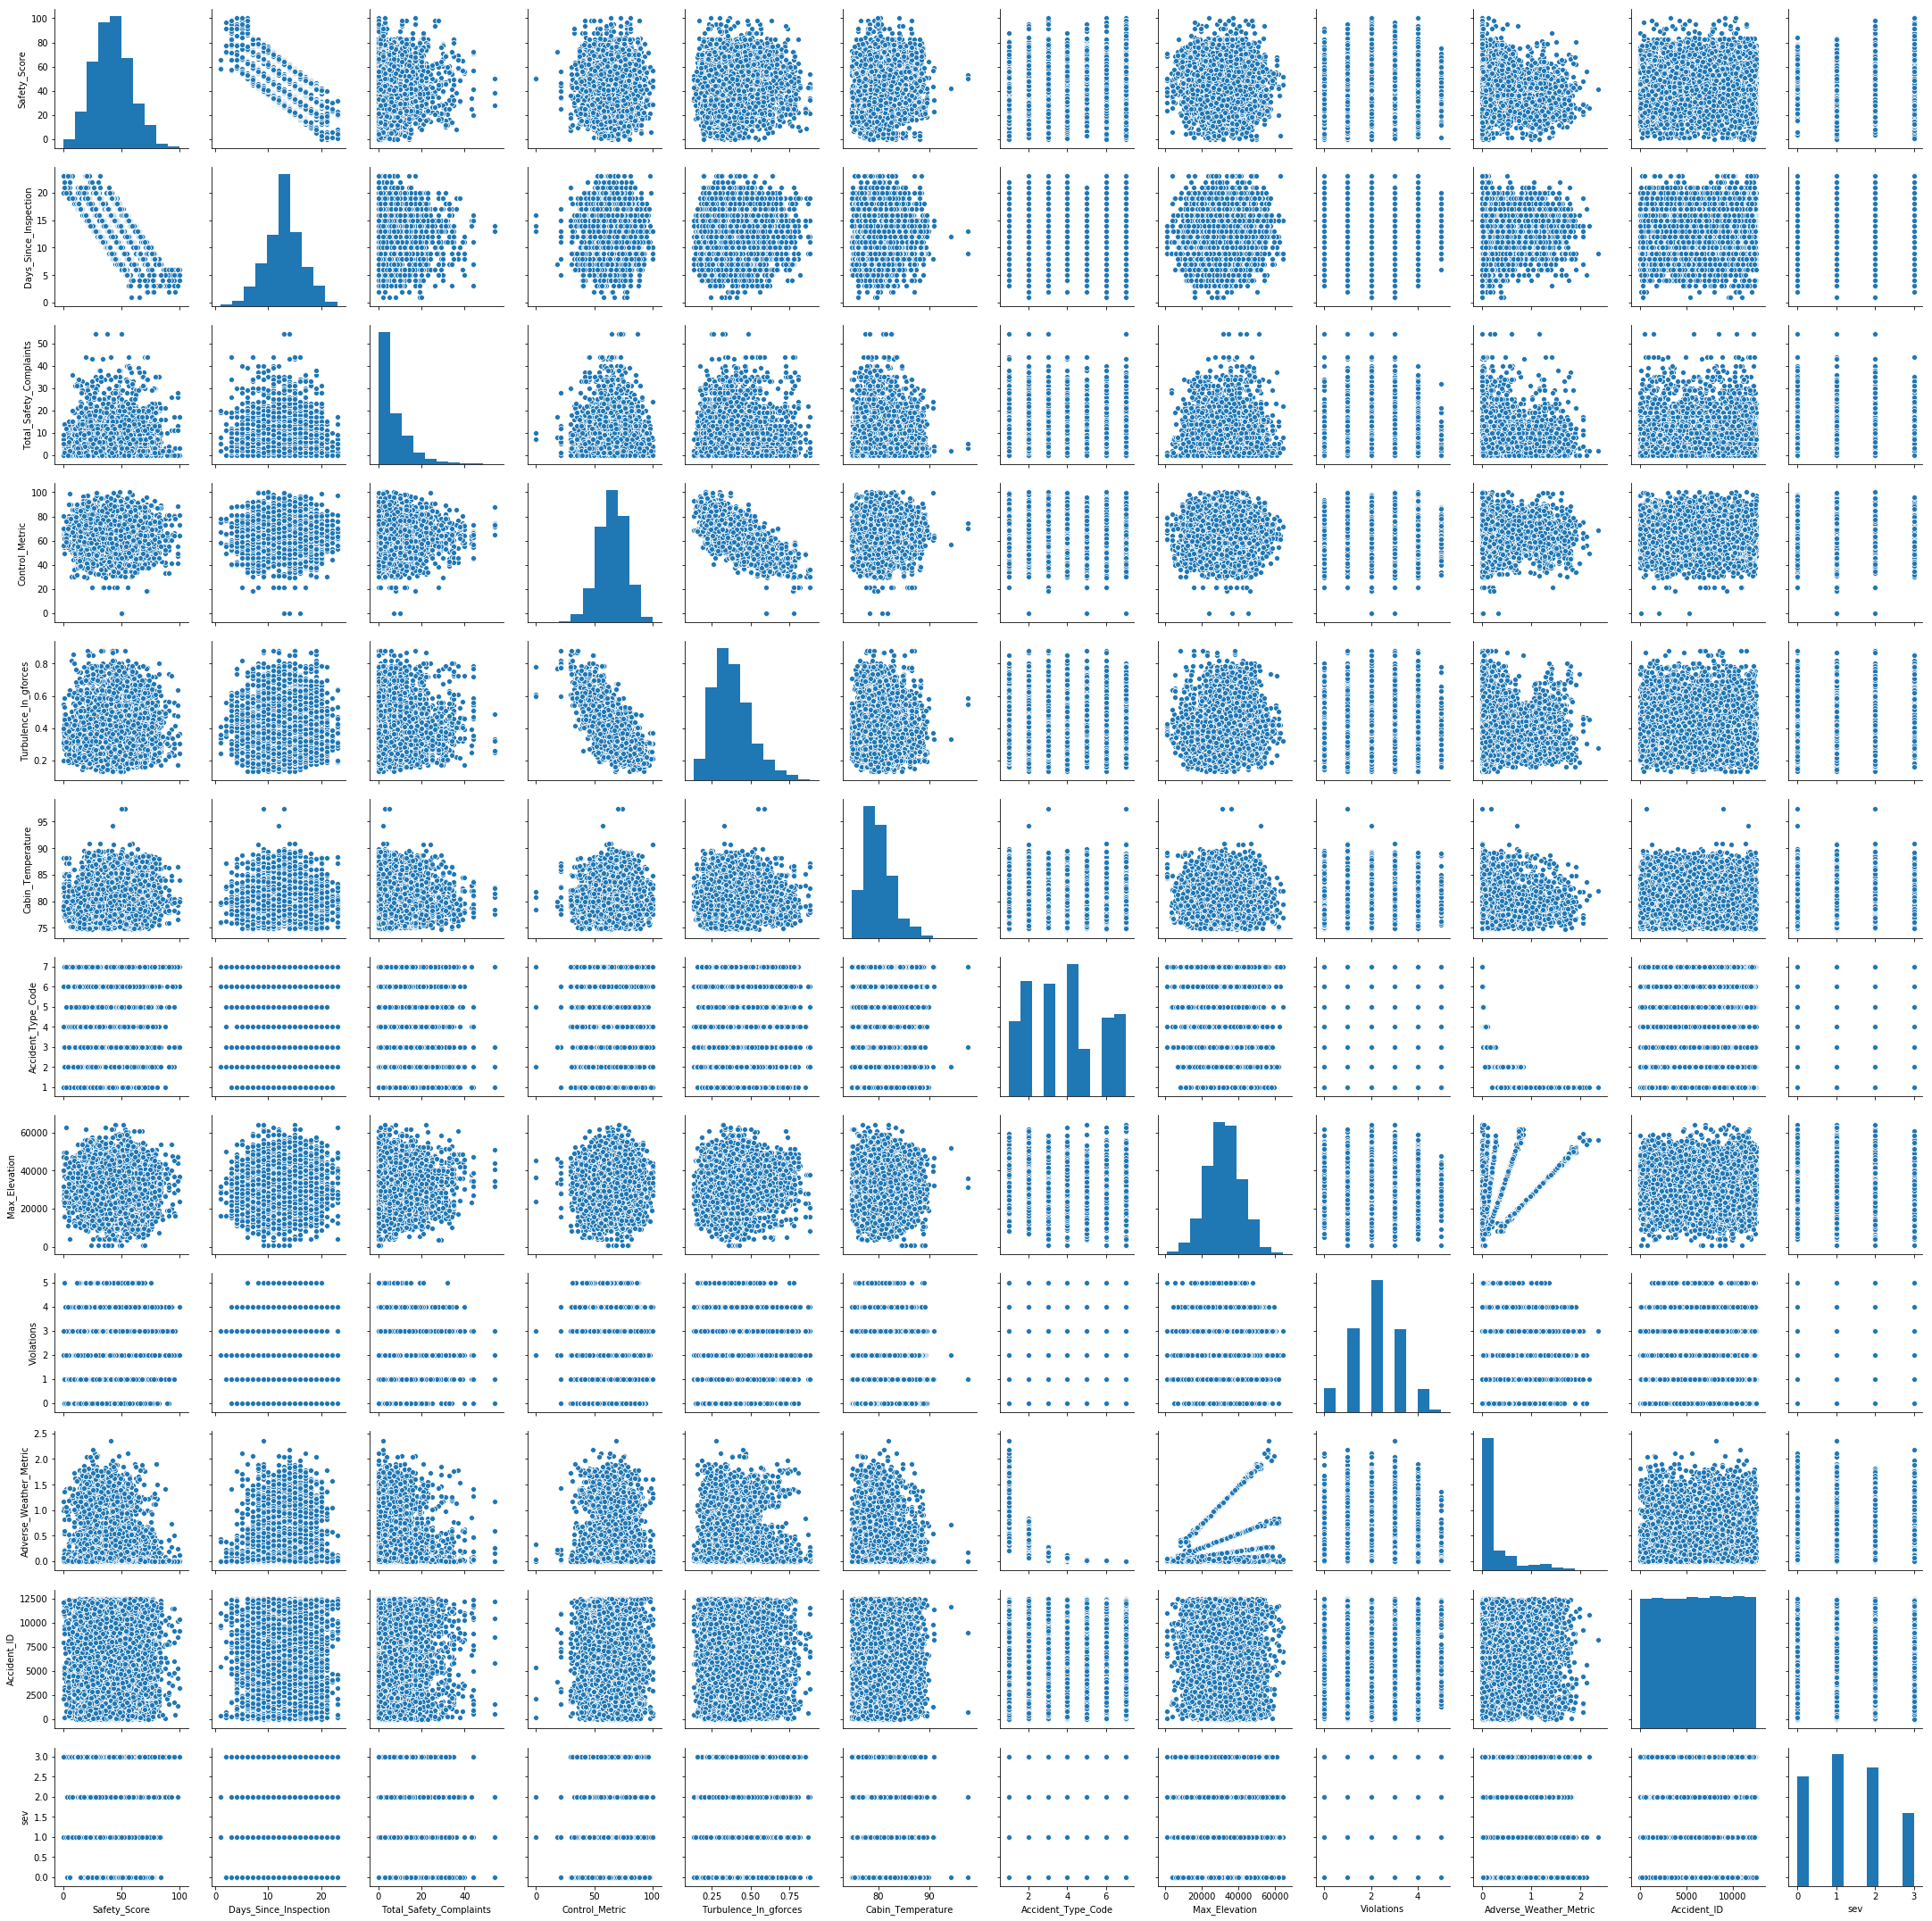

In [90]:
sns.pairplot(data=df)

In [92]:
sns.pairplot(data=testdata)

In [93]:
df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID', 'sev'],
      dtype='object')

In [148]:
# Below columns look interesting 
df[['Turbulence_In_gforces' ,'Control_Metric','Adverse_Weather_Metric', 'Max_Elevation'  ,'Days_Since_Inspection','Severity']].sample()

Turbulence_In_gforces  Control_Metric  Adverse_Weather_Metric  \
9062                0.36047       63.764813                0.427069   

      Max_Elevation  Days_Since_Inspection                   Severity  
9062   31546.438267                     15  Minor_Damage_And_Injuries

In [100]:
sns.heatmap(
df[['Turbulence_In_gforces' ,'Control_Metric','Adverse_Weather_Metric', 'Max_Elevation'  ,'Days_Since_Inspection','sev']]
)

In [147]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0.5,
    #cmap=sns.diverging_palette(20,220,n=200),
    cmap='coolwarm',
    square=True,
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [149]:
sns.lineplot(x=df['Turbulence_In_gforces'],y=df['Control_Metric'])
# Inference : more turbulence , less the control

In [157]:
df[['Adverse_Weather_Metric', 'Max_Elevation','sev']].sort_values(by=['Max_Elevation']).tail(20)

Adverse_Weather_Metric  Max_Elevation  sev
6266                0.775873   59108.877166    0
4993                0.836582   59108.877166    0
851                 2.057714   59153.886739    1
2464                0.004765   60252.163369    0
2309                0.015040   60252.163369    0
9082                0.746909   60676.860208    2
5531                0.005551   60869.748698    3
1406                0.777802   60869.748698    0
7829                0.773010   61815.498290    0
4243                0.836582   61815.498290    1
1805                0.736627   61815.498290    0
1939                0.746909   61815.498290    0
1031                0.798165   61815.498290    2
6477                0.746909   61815.498290    0
7910                0.106776   62471.874799    1
1099                0.015040   62672.599565    1
7573                0.004549   62672.599565    1
6092                0.004384   64297.651218    1
5795                0.004404   64297.651218    0
9739                0.033621   64297.651218    2

In [162]:
print(df.shape)
print(testdata.shape)

(10000, 13)
(2500, 11)


In [160]:
comb=pd.concat([df,testdata],axis=0)

C:\Users\akashmas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [161]:
comb.head(4)

Accident_ID  Accident_Type_Code  Adverse_Weather_Metric  Cabin_Temperature  \
0         7570                   2                0.424352              78.04   
1        12128                   2                0.352350              84.54   
2         2181                   7                0.003364              78.86   
3         5946                   3                0.211728              81.79   

   Control_Metric  Days_Since_Inspection  Max_Elevation  Safety_Score  \
0       71.285324                     14   31335.476824     49.223744   
1       72.288058                     10   26024.711057     62.465753   
2       66.362808                     13   39269.053927     63.059361   
3       74.703737                     11   42771.499200     48.082192   

                                  Severity  Total_Safety_Complaints  \
0                Minor_Damage_And_Injuries                       22   
1                Minor_Damage_And_Injuries                       27   
2        Significant_Damage_And_Fatalities                       16   
3  Significant_Damage_And_Serious_Injuries                        9   

   Turbulence_In_gforces  Violations  sev  
0               0.272118           3  0.0  
1               0.423939           2  0.0  
2               0.322604           3  3.0  
3               0.337029           1  2.0

In [180]:
df.head(20)

Severity  Safety_Score  \
0                 Minor_Damage_And_Injuries     49.223744   
1                 Minor_Damage_And_Injuries     62.465753   
2         Significant_Damage_And_Fatalities     63.059361   
3   Significant_Damage_And_Serious_Injuries     48.082192   
4         Significant_Damage_And_Fatalities     26.484018   
5                 Minor_Damage_And_Injuries     43.333333   
6                 Highly_Fatal_And_Damaging     22.009132   
7                 Minor_Damage_And_Injuries     24.703196   
8                 Highly_Fatal_And_Damaging     54.840183   
9   Significant_Damage_And_Serious_Injuries     52.237443   
10                Highly_Fatal_And_Damaging     36.666667   
11  Significant_Damage_And_Serious_Injuries     48.127854   
12  Significant_Damage_And_Serious_Injuries     42.876712   
13        Significant_Damage_And_Fatalities     63.652968   
14                Highly_Fatal_And_Damaging     26.027397   
15                Highly_Fatal_And_Damaging     49.589041   
16                Highly_Fatal_And_Damaging     10.867580   
17        Significant_Damage_And_Fatalities     38.767123   
18        Significant_Damage_And_Fatalities     78.219178   
19        Significant_Damage_And_Fatalities     20.228311   

    Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                      14                       22       71.285324   
1                      10                       27       72.288058   
2                      13                       16       66.362808   
3                      11                        9       74.703737   
4                      13                       25       47.948952   
5                      15                        0       73.336372   
6                      15                       10       62.853236   
7                      18                        4       60.802188   
8                       5                       40       69.234275   
9                       6                        4       57.429353   
10                     11                       11       80.218778   
11                     11                        2       62.807657   
12                     12                       14       68.960802   
13                     13                        4       78.669098   
14                     14                        2       83.546035   
15                      7                        1       85.551504   
16                     18                        1       68.003646   
17                     10                        4       37.830447   
18                      8                        3       61.485871   
19                     15                        2       41.567912   

    Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0                0.272118              78.04                   2   
1                0.423939              84.54                   2   
2                0.322604              78.86                   7   
3                0.337029              81.79                   3   
4                0.541140              77.16                   3   
5                0.432954              78.63                   2   
6                0.314671              88.04                   4   
7                0.548353              83.48                   4   
8                0.335587              78.24                   2   
9                0.465410              79.56                   1   
10               0.452788              81.15                   2   
11               0.329096              77.80                   3   
12               0.159604              77.23                   3   
13               0.232089              80.78                   7   
14               0.362994              81.63                   3   
15               0.270314              78.86                   3   
16               0.309622              82.08                   6   
17               0.600282              80.82              

In [210]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=100)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rfc=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None,
                                        max_features=0.9000000000000001,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=3, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)
    rfc.fit(X_train,y_train)
    k_rfc=rfc.predict(X_test)
    print("acc: ",accuracy_score(y_test,k_rfc))

acc:  0.952
acc:  0.952
acc:  0.962
acc:  0.937
acc:  0.948
acc:  0.945
acc:  0.945
acc:  0.956
acc:  0.945
acc:  0.951


In [211]:
ans=rfc.predict(testdata)
sub=testdata.Accident_ID
ans=pd.DataFrame(ans,columns=['Severity'])
final_sub=pd.concat([sub,ans],axis=1)
final_sub['Severity']=final_sub['Severity'].map(rev_dict_sev)
final_sub.to_csv('kfold_rfc_predictions.csv',index=False)

# 84.29394 Not much imporovement!


# Feature Engineering

In [212]:
df.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.322604              78.86                   7   
3               0.337029              81.79                   3   
4               0.541140              77.16                   3   

   Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  sev  
0   31335.476824           3                0.424352         7570    0  
1   26024.711057           2                0.352350        12128    0  
2   39269.053927           3                0.003364         2181    3  
3   42771.499200           1                0.211728         5946    2  
4   35509.228515           2                0.176883         9054    3